## Program to perform SVM analysis

In [1]:
%matplotlib inline
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

import scipy 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

Automatically created module for IPython interactive environment


In [2]:
# Read the input file
import csv
outputFile = open('output.csv', 'r')
datareader = csv.reader(outputFile)
data = []
for row in datareader:
    data.append(row)  
data = np.asarray(data)

# Get the data into appropiate arrays
Feature_name = data[0,2:]
circuit_name = data[1:, 0]
y_labels = data[1:,1]
x_data = (data[1:,2:]).astype(int)
# scipy.sparse.csr_matrix()

In [3]:
# Run this if the data is sparse
# X = scipy.sparse.csr_matrix(x_data, dtype=np.float64)
X = x_data
# Numeric encode the labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

#get the class names
class_names = np.unique(y_labels)

# Function to plot confusion Matrix

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# SVM training model with RBF kernal

In [17]:

# # Add noisy features to make the problem harder
random_state = np.random.RandomState(0)


# # shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# get index of fail traing point and increase its weight
itemindex = np.where(y_train==0)
sample_weight_fail = np.ones(len(X_train))
sample_weight_fail[itemindex] *=2

In [18]:
# Learn to predict each class against the other
classifier = (svm.SVC(kernel='rbf', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Weighted classifier for unbalanced data

wclf = (svm.SVC(kernel='rbf', class_weight= {0: 2},probability=True,
                                 random_state=random_state))

y_score_w = wclf.fit(X_train, y_train).decision_function(X_test)
y_pred_w = wclf.fit(X_train, y_train).predict(X_test)

fpr_w, tpr_w, _ = roc_curve(y_test, y_score_w)
roc_auc_w = auc(fpr_w, tpr_w)

# Weighted classifier for unbalanced data

wsclf =(svm.SVC(kernel='rbf', probability=True,
                                 random_state=random_state))

y_score_ws = wsclf.fit(X_train, y_train, sample_weight= sample_weight_fail).decision_function(X_test)
y_pred_ws = wsclf.fit(X_train, y_train, sample_weight= sample_weight_fail).predict(X_test)

fpr_ws, tpr_ws, _ = roc_curve(y_test, y_score_ws)
roc_auc_ws = auc(fpr_ws, tpr_ws)


# Plot ROC curves

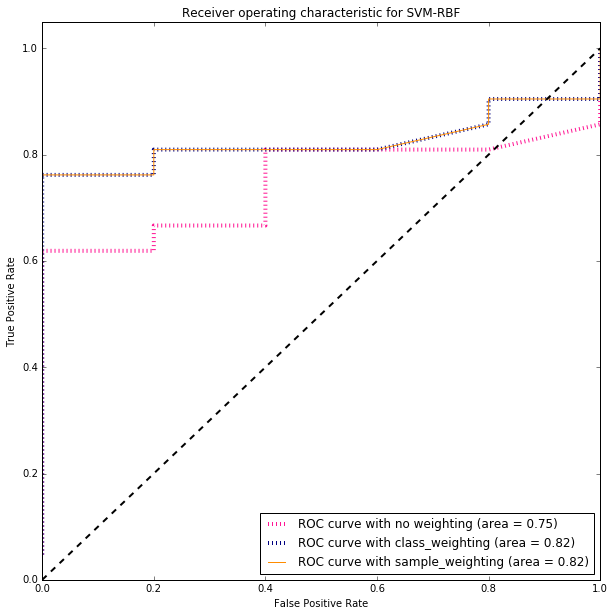

In [19]:

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr,
         label='ROC curve with no weighting (area = {0:0.2f})'
               ''.format(roc_auc),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr_w, tpr_w,
         label='ROC curve with class_weighting (area = {0:0.2f})'
               ''.format(roc_auc_w),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr_ws, tpr_ws,
         label='ROC curve with sample_weighting (area = {0:0.2f})'
               ''.format(roc_auc_ws),
         color='darkorange', linestyle='-', linewidth=1)


plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM-RBF')
plt.legend(loc="lower right")


# Compute Confusion Matrix

Confusion matrix, without normalization
[[ 0  5]
 [ 0 21]]
Confusion matrix, without normalization
[[ 5  0]
 [11 10]]
Confusion matrix, without normalization
[[ 5  0]
 [11 10]]


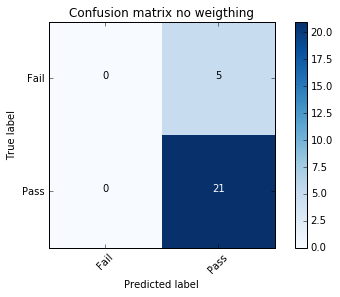

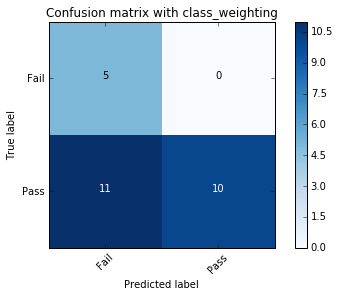

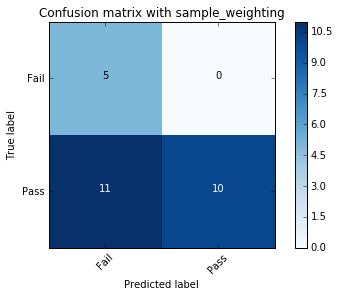

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix no weigthing')


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_w)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with class_weighting')


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_ws)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with sample_weighting')